In [1]:
# #####################################################
# This is a demo for using chili-etc: CHILI Exposure Time Calculator              #
# #####################################################
# CHILI-ETC is used for setting the CHILI exposure time parameters. by YuLiang yuliang@shao.ac.cn . 
# This work is based on the work of the predecessors
# (by Lin Lin@SHAO: https://ifs-etc.readthedocs.io/en/latest/quickstart.html), 
# and has been modified and completed on the basis of it.

In [2]:
from chili_etc.sp.chili_config import build_default_calc
from chili_etc.sp.chili_perform_calculation import perform_calculation

In [3]:
chili_config = build_default_calc()
chili_config['obst'] = 300
chili_config['repn'] = 3
chili_config['source']['normalization']['value'] = 18.0
chili_config['source']['spectrum']['name'] = 'SFgal_texp_FeH0_tau5_Ew10_AGN1.fits'
report = perform_calculation(chili_config)
print(report.snr)

[0.92843857 0.94174381 0.95242538 ... 0.85432544 0.85263026 0.85199531]


In [4]:
import matplotlib.pyplot as plt
#plt.plot(report.snr)
snrs = report.snr
print(snrs.shape)
from astropy.io import fits
def openfits(b):
    hdu_list = fits.open(b)
    hdu_list.info()
    image_data = hdu_list[0].data
    plt.imshow(image_data, cmap='gray')
    plt.colorbar()
    plt.show()
# change the dir of the REFDATA in your real dir
hdu = fits.open(r"C:\Users\DELL\Anaconda3\Lib\site-packages\chili_etc-0.0.15-py3.7.egg\chili_etc\refdata\sed\SFgal_texp_FeH0_tau5_Ew10_AGN1.fits")
print(hdu[1].header)
imagn = hdu[1].data

(3703,)
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   16 / length of dimension 1                          NAXIS2  =                 5564 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    4 / number of table fields                         TTYPE1  = 'WAVELENGTH'                                                          TFORM1  = 'E       '                                                            TUNIT1  = 'angstrom'                                                            TTYPE2  = 'FLUX    '                                                            TFORM2  = 'E       '            

(5564,)


Text(0.5, 1.0, 'report.SNR')

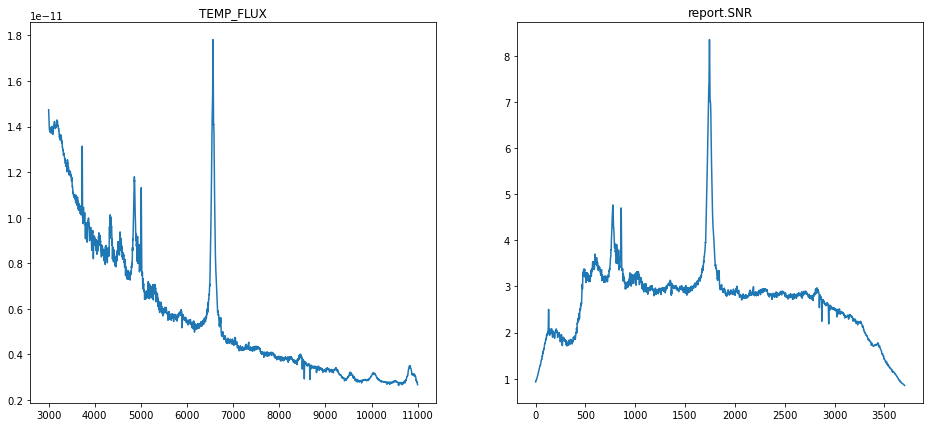

In [5]:
print(imagn.shape)
template_wave = hdu[1].data['wavelength']
template_flux = hdu[1].data['flux'] * 1e-12

import matplotlib.pyplot as plt
plt.figure(figsize=[16,7])
plt.subplot(121)
plt.plot(template_wave,template_flux)
plt.title('TEMP_FLUX')
plt.subplot(122)
plt.plot(report.snr)
plt.title('report.SNR')

In [6]:
report = perform_calculation(chili_config, calculation_mode='snr2exptime')
print(report.exptime)

10246.301687347346


[0.92843857 0.94174381 0.95242538 ... 0.85432544 0.85263026 0.85199531]


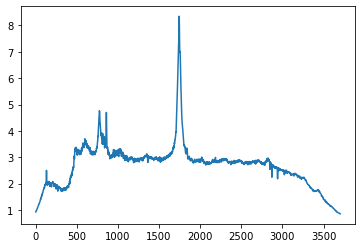

In [7]:
report = perform_calculation(chili_config, calculation_mode='exptime2snr')
print(report.snr)
plt.plot(report.snr)

In [8]:
report = perform_calculation(chili_config, calculation_mode='snr2limitmag')
print(report.limitmag)

16.358350199466365


In [9]:
config = build_default_calc()
config['targetsnr'] = 10
config['obst'] = 300
config['source']['normalization']['value'] = 18.0
config['source']['spectrum']['name'] = 'SFgal_texp_FeH0_tau1_Ewd.fits'
report = perform_calculation(config, calculation_mode='snr2exptime')
print(report.exptime)

6935.459285529389
